In [1]:
import os, sklearn, pandas, numpy as np
from sklearn import svm
import skimage, skimage.io, skimage.filters
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set cwd back to default
os.chdir('../')

In [3]:
## NN libs
import keras
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Reshape, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model
from sklearn import preprocessing
from sklearn.preprocessing import normalize

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# custom scripts
import config # params, constants
import data, models # functions that mutate outr data
from utils import utils, plot # custom functions, in local environment

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'validation' = ['img_name']
    , 'labels' = pandas.df('img_name','label')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


## 2D decoder

In [5]:
# input length controls the complexity of the final distribution
# higher input values result in a more normal output distribution and a more circular graph
input_length = 2 
input_shape = (input_length,)
w = 100 # width of the network
k_init = 'glorot_normal' # random_uniform glorot_normal
b_init = 'glorot_normal'

In [6]:
input_ = Input(shape=input_shape)
x = Dense(w, activation='relu')(input_) # (None, 128)
for i in range(10):
    x = Dense(w, activation='relu', kernel_initializer=k_init, bias_initializer=b_init)(x) # (None, 128)
# for i in range(10):
# x = Reshape(x)
# x = keras.layers.UpSampling1D(())(x)
    #     x = Conv2D(3, (3, 3), activation='relu')(x)


# x = Reshape((4,4,8))(x) # (None, 4, 4, 8)  
# x = UpSampling2D((8, 8))(x) # (None, 32, 32, 8)
# x = Conv2D(4, (8, 8), activation='relu')(x) # (None, 25, 25, 4)
# x = UpSampling2D((2, 2))(x) # (None, 100, 100, 4)
# x = Conv2D(3, (1, 1), activation='relu')(x) # (None, 50, 50, 3) 

n_colors = 3
output_w = 300
output_h = 200
n_outputs = output_h * output_w * n_colors
output_shape = (output_h, output_w, n_colors)
# print('output_shape:', output_shape)
# resized = Dense(n_outputs, activation='sigmoid')(x)
# x = Reshape(output_shape)(resized)
x = Dense(2,activation='sigmoid')(x)

decoder = Model(input_, x)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
__________

In [7]:
decoder.compile(optimizer='adam', loss='categorical_crossentropy')

In [8]:
n = 1000 * 100
x_test = np.random.random([n,input_length])
# samples = np.stack([sample])
y_test = decoder.predict(x_test)

In [9]:
print(y_test.shape)
print(y_test.max(), y_test.min())

(100000, 2)
0.57258856 0.5386357


In [10]:
# TODO use sklearn.preprocessing.normalize(axis=0) # to normalize each feature
def normalize2D(y_test):
    maxx = y_test.max()
    minn = y_test.min()
    return (y_test.copy() - minn) / (maxx - minn)

In [11]:
normalized = normalize2D(y_test)

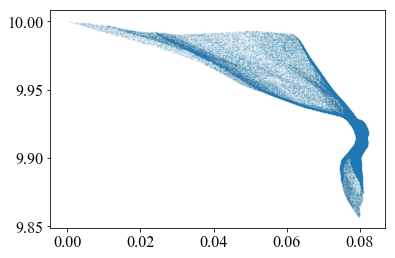

In [12]:
a = 10
# result = y_test
result = normalized
plt.scatter(result[:,0] * a,result[:,1] * a, alpha=0.1, s=0.1)

In [13]:
# plt.savefig('../plots/gan.png', bbox_inches='tight')

In [14]:
normalized.mean()

0.5002642

# 3D decoder
(test)

In [15]:
input_length = 2 # this controls the complexity of the final distribution
input_shape = (input_length,)
output_length = 3 # 3d
w = 100 # width of the network
k_init = 'glorot_normal' # random_uniform glorot_normal
b_init = 'glorot_normal'

In [33]:
input_ = Input(shape=input_shape)
x = Dense(w, activation='relu')(input_) # (None, 128)
for i in range(10):
    x = Dense(w, activation='relu', kernel_initializer=k_init, bias_initializer=b_init)(x) # (None, 128)

x = Dense(output_length ,activation='sigmoid')(x)

decoder = Model(input_, x)
decoder.summary()

decoder.compile(optimizer='adam', loss='categorical_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_73 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_74 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_75 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_76 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_77 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_78 (Dense)             (None, 100)               10100     
__________

In [17]:
n = 1000 * 10
x_test = np.random.random([n,input_length])
# samples = np.stack([sample])
y_test = decoder.predict(x_test)
print('shape:', y_test.shape)
print('minmax',y_test[0].max(), y_test[0].min())

shape: (10000, 3)
minmax 0.6210563 0.31183663


In [18]:
a = 10
# for frame in y_test[:0]:
#     result = normalize2D(frame)
#     plt.scatter(result[:,0] * a, result[:,1] * a, alpha=0.1, s=0.1)

In [19]:
result = y_test[:,1:3]
result = normalize(result)
result.shape

NameError: name 'normalize' is not defined

In [ ]:
plt.scatter(result[:,0] * a, result[:,1] * a, alpha=0.1, s=0.1)

In [ ]:
# normalize z_values
def normalize1D(vector=[]):
    minn = vector.min()
    maxx = vector.max()
    return (vector.copy() - minn) / (maxx - minn)

In [ ]:
# z values correspond to the 3d dimension (time)
z_values = y_test[:,0]
z_values = normalize1D(z_values)

In [ ]:
plt.hist(z_values)

In [ ]:
frames_list = []
n_frames = 3
for i in range(n_frames):
    lower = i * 1./n_frames
    upper = (i+1) * 1./n_frames
    c = (lower <= z_values) & (z_values < upper)
    frames = (y_test[np.where(c)])
    frames_list.append(frames)
    #     frames = y_test[ np.where(z_values < 0.5) ]

frame = frames_list[0]
frames[:,1:3].shape

In [ ]:
frame = frames_list[0]
# result = normalize2D(frames[:,1:3])
result = normalize(frames[:,1:3], axis=0)
a = 1000
plt.scatter(result[:,0] * a, result[:,1] * a, alpha=0.1, s=0.1)

In [ ]:
frame = frames_list[-1]
# result = normalize2D(frames[:,1:3])
result = normalize(frames[:,1:3], axis=0)
a = 1000
plt.scatter(result[:,0] * a, result[:,1] * a, alpha=0.1, s=0.1)

# 2D decoder with 3D input

In [40]:
def decoder(input_length=2, w=100, k_init = 'glorot_normal', b_init = 'glorot_normal'):
    """
    :input_length controls the complexity of the final distribution
      higher input values result in a more normal output distribution and a more circular graph
    :w = width of the network
    :k_init, :b_init = types of distributions
    """
    input_shape = (input_length,)
    input_ = Input(shape=input_shape)
    # use lots of neurons to generate complexity
    n_hidden_layers = 10
    x = Dense(w, activation='relu')(input_) # (None, 128)
    for i in range(n_hidden_layers):
        x = Dense(w, activation='relu', kernel_initializer=k_init, bias_initializer=b_init)(x) # (None, 128)

    # output layer (e.g. x,y coordinates)
    x = Dense(output_length ,activation='sigmoid')(x)
    decoder = Model(input_, x)
    decoder.compile(optimizer='adam', loss='categorical_crossentropy')
    return decoder, decoder.summary

In [41]:
input_length = 3
model, summary = decoder(input_length)
summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3)                 0         
_________________________________________________________________
dense_109 (Dense)            (None, 100)               400       
_________________________________________________________________
dense_110 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_111 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_112 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_113 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_114 (Dense)            (None, 100)               10100     
__________

### Generate training data, for different frames

For each input vector:
 - vector.shape = (z,y,x)
     - x,y = cartesian coordinates
     - z = instance in time

The model simulated a distribution, conditionally on z.

In [205]:
# store data for each instance independently
x_test_list = []
n = 1000 * 1
for z in [0, 0.5, 0.6]:
    x_test = np.random.random([n,input_length])
    x_test[:,0] = z
    x_test_list.append(x_test)
x_test.shape

(1000, 3)

In [206]:
y_test_list = []
for x_test in x_test_list:
    y_test_list.append(model.predict(x_test))
y_test.shape

(10, 3)

In [207]:
# scale/normalize data, based on features
# axis determines whether the data is scaled based on the 'global' features
# axis = 0: max per feature (between instances)
# axis = 1: max per instance (ignore features)
# e.g. np.arange(9).reshape(3,3).max(axis=0)

# MinMaxScaler uses axis=0
min_max_scaler = preprocessing.MinMaxScaler()
y_test_xy_list = []
for y_test in y_test_list:
    y_test_xy = y_test[:,1:3] # omit z
    normalized = min_max_scaler.fit_transform(y_test_xy)
    y_test_xy_list.append(normalized)
    
print(normalized.min(), normalized.mean(), normalized.max())

0.0 0.40529138 1.0


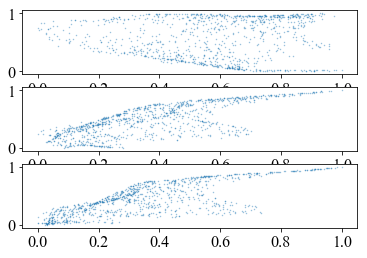

In [208]:
plt.figure(1)
for i,plot_config in enumerate([311,312,313]):
    plt.subplot(plot_config)
    x_values = y_test_xy_list[i][:,0]
    y_values = y_test_xy_list[i][:,1]
    plt.scatter(x_values, y_values, alpha=0.5, s=0.2)
# plt.scatter(x_values, y_values, alpha=0.5, s=0.2)

In [209]:
y_values.shape

(1000,)

In [210]:
y_test_xy_list[0].shape

(1000, 2)

In [211]:
y_test_list[0].shape

(1000, 3)